<a href="https://colab.research.google.com/github/Dennieeeee/COVID19-Pandemic/blob/master/COVID19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
file='https://raw.githubusercontent.com/Dennieeeee/COVID19-Pandemic/master/covid19_unemployment_2020'
#file2 is the one after outliers are removed
file2 = 'https://raw.githubusercontent.com/Dennieeeee/COVID19-Pandemic/master/COVID19_unemp_v2'
df=pd.read_csv(file2)

# Columns
- ALAND: Area of Land (square meters)
- AWATER: Area of Water (square meters)
- NAME: City Name
- State: State
- LaborForce_01Month: Count of people within the US labor force, 1 month prior to current
- Employed_01Month: Count of employed population, 1 month prior to current
- Unemployed_01Month: Count of unemployed population, 1 month prior to current
- PctUnemployed_01Month: Percent unemployed population, 1 month prior to current
- CurrentMonth: Month and year, most current month offered by BLS
- vulnerability_index: Vulnerability Index
- rank_cvi: Rank
- fips_cvi: Fips

In [ ]:
df.head()

,Unnamed: 0,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi,percent_employed
0,0,1539602137,25706961,Autauga County,Alabama,25835.0,25114.0,721.0,2.8,April 2020 - Preliminary,110.31,401,1001,0.972092
1,1,4117621645,1132980868,Baldwin County,Alabama,96391.0,93782.0,2609.0,2.7,April 2020 - Preliminary,146.88,91,1003,0.972933
2,2,2292160139,50523213,Barbour County,Alabama,8537.0,8221.0,316.0,3.7,April 2020 - Preliminary,87.78,1455,1005,0.962985
3,3,1612167476,9602089,Bibb County,Alabama,8617.0,8348.0,269.0,3.1,April 2020 - Preliminary,69.94,2398,1007,0.968783
4,4,1670103866,15015467,Blount County,Alabama,25103.0,24421.0,682.0,2.7,April 2020 - Preliminary,92.04,1224,1009,0.972832


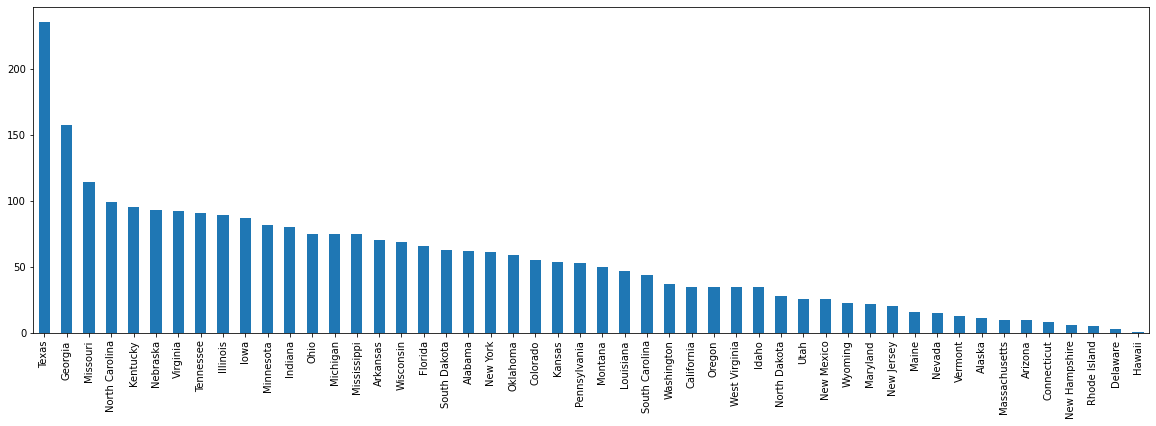

In [ ]:
df['State'].value_counts().plot(kind='bar',figsize=(20,6))

In [ ]:
df.describe()

,Unnamed: 0,ALAND,AWATER,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,vulnerability_index,rank_cvi,fips_cvi,percent_employed
count,2712.000000,2.712000e+03,2.712000e+03,2.712000e+03,2.712000e+03,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000
mean,1570.270280,2.562338e+09,1.714436e+08,5.432668e+04,5.190552e+04,2421.162611,4.582264,88.170199,1537.429204,30624.427729,0.954184
std,891.335722,5.646907e+09,8.336456e+08,1.774980e+05,1.683569e+05,9415.910158,1.263020,26.863165,901.701183,15010.673756,0.012634
min,0.000000,5.869050e+07,1.983800e+04,2.080000e+02,1.970000e+02,7.000000,2.600000,18.470000,1.000000,1001.000000,0.921524
25%,777.750000,1.117973e+09,7.731952e+06,5.336250e+03,5.094000e+03,241.000000,3.600000,71.820000,750.750000,18176.500000,0.945984
50%,1583.500000,1.572621e+09,1.969326e+07,1.263350e+04,1.203250e+04,562.000000,4.400000,86.540000,1530.500000,29226.000000,0.955895
75%,2354.250000,2.341168e+09,6.107484e+07,3.398625e+04,3.212175e+04,1487.500000,5.400000,100.602500,2308.250000,46013.500000,0.964087
max,3089.000000,2.300542e+11,2.252565e+10,4.996564e+06,4.669061e+06,327503.000000,7.800000,348.830000,3140.000000,56045.000000,0.974497


In [ ]:
#Find out the average and median unemployment for each state
df.groupby('State').agg(['mean','median']).head()

Unnamed: 0                ALAND  ... fips_cvi percent_employed          
                  mean median          mean  ...   median             mean    median
State                                        ...                                    
Alabama      31.387097   30.5  1.964455e+09  ...   1062.0         0.965403  0.968247
Alaska       79.818182   79.0  4.156508e+10  ...   2130.0         0.943317  0.950241
Arizona     101.800000  101.5  1.738879e+10  ...   4012.5         0.934307  0.934550
Arkansas    147.828571  148.5  1.796615e+09  ...   5078.0         0.944531  0.946072
California  211.457143  213.0  6.977202e+09  ...   6057.0         0.948935  0.950853

[5 rows x 22 columns]

In [ ]:
df.head(2)

,Unnamed: 0,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi,percent_employed
0,0,1539602137,25706961,Autauga County,Alabama,25835.0,25114.0,721.0,2.8,April 2020 - Preliminary,110.31,401,1001,0.972092
1,1,4117621645,1132980868,Baldwin County,Alabama,96391.0,93782.0,2609.0,2.7,April 2020 - Preliminary,146.88,91,1003,0.972933


# The answers to the questions below:
- Which counties have the highest Labour Force?
- Which counties have the highest unemployment?
- Which county has the highest COVID-19 Vulnerability Index (CVI)?
- What is the correlation between the CVI and the Unemployment rate?
- Which county has higher CVI among the top county with a higher unemployment rate?
- What are the changes in Landsat 8 OLI (Operational Land Imager) and TIRS (Thermal Infrared Sensor) images of that area?

In [ ]:
# Top 5 counties with the highest labor force
index_top5 = list(df['LaborForce_01Month'].sort_values(ascending=False).index[:5])
laborForce_top5 = df.loc[index_top5]

In [ ]:
laborForce_top5

,Unnamed: 0,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi,percent_employed
165,203,10511861492,1793485467,Los Angeles County,California,4996564.0,4669061.0,327503.0,6.6,April 2020,122.14,221,6037,0.934454
524,605,2447357982,1786325586,Cook County,Illinois,2615106.0,2488391.0,126715.0,4.8,April 2020 - Preliminary,108.14,458,17031,0.951545
78,102,23829622328,63347750,Maricopa County,Arizona,2334396.0,2209663.0,124733.0,5.3,April 2020 - Preliminary,103.54,617,4013,0.946567
2280,2610,4418909573,184757689,Harris County,Texas,2321037.0,2191290.0,129747.0,5.6,April 2020 - Preliminary,98.63,857,48201,0.944100
171,214,2053367783,401931862,Orange County,California,1587658.0,1528641.0,59017.0,3.7,April 2020 - Preliminary,110.95,389,6059,0.962828


In [ ]:
y=list(laborForce_top5.LaborForce_01Month)
x=[1,2,3,4,5]
t=list(laborForce_top5.NAME.values)

Text(0.5, 1.0, 'Top 5 Counties with the Highest Labor Forces')

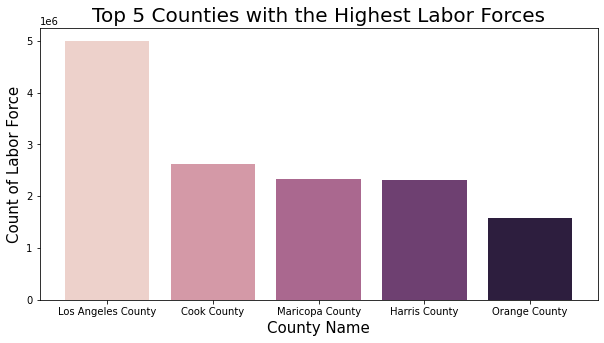

In [ ]:
plt.figure(figsize=(10,5))
b_col = sns.cubehelix_palette(5,reverse=False) #reverse by default is False
plt.bar(x,y,color=b_col)
plt.xticks(x,t)
plt.xlabel('County Name',size=15)
plt.ylabel('Count of Labor Force',size=15)
plt.title('Top 5 Counties with the Highest Labor Forces',size=20)

In [ ]:
#sorted by the unemployment in the county, decending order
unemp_index_top5 = list(df.Unemployed_01Month.sort_values(ascending=False).index[:5])
unemp_top5 = df.loc[unemp_index_top5]
unemp_top5

,Unnamed: 0,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi,percent_employed
165,203,10511861492,1793485467,Los Angeles County,California,4996564.0,4669061.0,327503.0,6.6,April 2020,122.14,221,6037,0.934454
2280,2610,4418909573,184757689,Harris County,Texas,2321037.0,2191290.0,129747.0,5.6,April 2020 - Preliminary,98.63,857,48201,0.944100
524,605,2447357982,1786325586,Cook County,Illinois,2615106.0,2488391.0,126715.0,4.8,April 2020 - Preliminary,108.14,458,17031,0.951545
78,102,23829622328,63347750,Maricopa County,Arizona,2334396.0,2209663.0,124733.0,5.3,April 2020 - Preliminary,103.54,617,4013,0.946567
1503,1737,20439276974,438416032,Clark County,Nevada,1143825.0,1061723.0,82102.0,7.2,April 2020 - Preliminary,164.34,54,32005,0.928222


In [ ]:
y2=list(unemp_top5.Unemployed_01Month)
x2=[1,2,3,4,5]
t2=list(unemp_top5.NAME.values)

Text(0.5, 1.0, 'Counties with the highest unemployment rate')

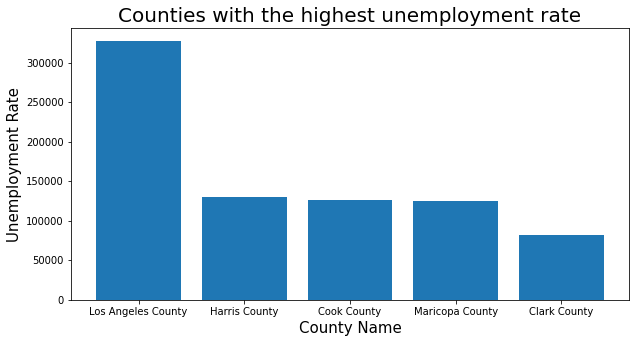

In [ ]:

plt.figure(figsize=(10,5))
plt.bar(x2,y2)
plt.xticks(x2,t2)
plt.xlabel('County Name',size=15)
plt.ylabel('Unemployment Rate',size=15)
plt.title('Counties with the highest unemployment rate',size=20)

In [ ]:
df.columns

Index(['Unnamed: 0', 'ALAND', 'AWATER', 'NAME', 'State', 'LaborForce_01Month',
       'Employed_01Month', 'Unemployed_01Month', 'PctUnemployed_01Month',
       'CurrentMonth', 'vulnerability_index', 'rank_cvi', 'fips_cvi',
       'percent_employed'],
      dtype='object')

In [ ]:
#Which counties have the highest vulnerability index
vul_index_top5 = list(df.vulnerability_index.sort_values(ascending=False).index[:5])
vul_top5 = df.loc[unemp_index_top5]
vul_top5

,Unnamed: 0,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi,percent_employed
954,1152,628956073,38794711,St. James Parish,Louisiana,9343.0,8615.0,728.0,7.8,April 2020 - Preliminary,69.51,2417,22093,0.922081
2438,2787,11609319514,56115726,Uintah County,Utah,13571.0,12506.0,1065.0,7.8,April 2020 - Preliminary,101.33,714,49047,0.921524
1941,2249,2299868389,23178644,Clinton County,Pennsylvania,18543.0,17093.0,1450.0,7.8,April 2020 - Preliminary,94.43,1094,42035,0.921803
1545,1787,11758505180,5554603,Cibola County,New Mexico,9070.0,8365.0,705.0,7.8,April 2020 - Preliminary,98.82,843,35006,0.922271
480,550,2012242918,18803193,Benewah County,Idaho,4129.0,3808.0,321.0,7.8,April 2020 - Preliminary,65.63,2568,16009,0.922257


In [ ]:
y3=list(vul_top5.vulnerability_index)
x3=[1,2,3,4,5]
t3=list(vul_top5.NAME.values)

Text(0.5, 0, 'County Name')

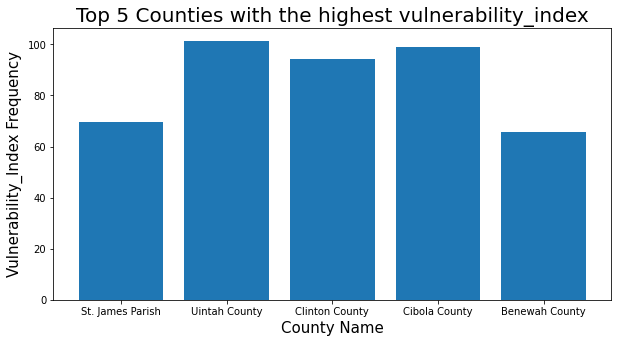

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x3,y3)
plt.xticks(x3,t3)
plt.title('Top 5 Counties with the highest vulnerability_index',size=20)
plt.ylabel('Vulnerability_Index Frequency',size=15)
plt.xlabel('County Name',size=15)

# Scatter Matrix

In [ ]:
'''
df2 = df.dropna()
colors = df2["Outcome"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(7,7), color=colors);
'''

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0015882f28>,
      dtype=object)

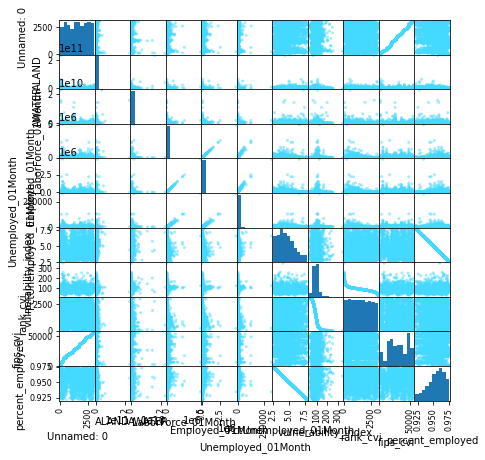

In [ ]:
colors=df['NAME'].map(lambda x:"#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df,figsize=(7,7),color=colors)

In [ ]:
df.corr()

,Unnamed: 0,ALAND,AWATER,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,vulnerability_index,rank_cvi,fips_cvi,percent_employed
Unnamed: 0,1.000000,-0.021365,-0.065974,-0.055575,-0.055843,-0.049163,0.026584,-0.046625,0.026191,0.996132,-0.027123
ALAND,-0.021365,1.000000,0.410615,0.058630,0.057764,0.072410,0.089406,0.018181,-0.019490,-0.034791,-0.088945
AWATER,-0.065974,0.410615,1.000000,0.063890,0.063737,0.064762,0.091215,0.126889,-0.113395,-0.071206,-0.091141
LaborForce_01Month,-0.055575,0.058630,0.063890,1.000000,0.999915,0.972337,-0.030484,0.152527,-0.215497,-0.056045,0.030285
Employed_01Month,-0.055843,0.057764,0.063737,0.999915,1.000000,0.969203,-0.034116,0.153316,-0.216829,-0.056263,0.033907
Unemployed_01Month,-0.049163,0.072410,0.064762,0.972337,0.969203,1.000000,0.035344,0.133971,-0.185392,-0.050512,-0.035349
PctUnemployed_01Month,0.026584,0.089406,0.091215,-0.030484,-0.034116,0.035344,1.000000,-0.011612,0.017778,0.014263,-0.999737
vulnerability_index,-0.046625,0.018181,0.126889,0.152527,0.153316,0.133971,-0.011612,1.000000,-0.891655,-0.045611,0.011695
rank_cvi,0.026191,-0.019490,-0.113395,-0.215497,-0.216829,-0.185392,0.017778,-0.891655,1.000000,0.024495,-0.017569
fips_cvi,0.996132,-0.034791,-0.071206,-0.056045,-0.056263,-0.050512,0.014263,-0.045611,0.024495,1.000000,-0.014877


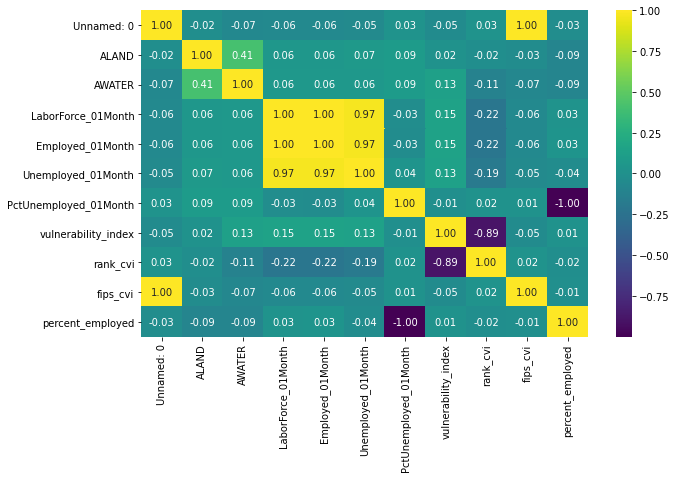

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap="viridis", fmt="0.2f")